# STEP 6

2-D Convection

2-D Convection is represented by the below PDE,
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizing these equations we get,
$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Rearranging both equations for the unknown, we get
$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$

The initial conditions are given below,
$$u,\ v\ = \begin{cases}\begin{matrix}
2 ; \text{for } x,y \in (0.5, 1)\times(0.5,1) \cr
1 ; \text{everywhere else}
\end{matrix}\end{cases}$$

The boundary conditions are given below,
$$u = 1,\ v = 1 \text{ for } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

In [10]:
nx=101
ny=101
nt=81
dx=2/(nx-1)
dy=2/(ny-1)
sigma=0.2
dt=sigma*dx
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,2,ny)
u=numpy.ones((ny,nx))
v=numpy.ones((ny,nx))
un=numpy.ones((ny,nx))
vn=numpy.ones((ny,nx))
u[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)]=2
v[int(0.5/dy):int(1/dy+1),int(0.5/dx):int(1/dx+1)]=2

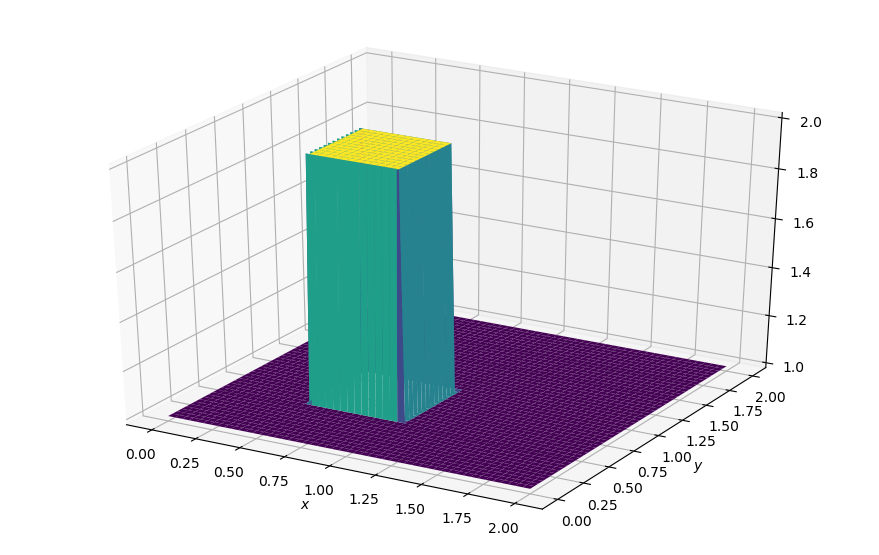

In [11]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [13]:
for t in range(nt+1):
    un=u.copy()
    vn=v.copy()
    for j in range(nx):
        for i in range(ny):
            u[j,i]=un[j,i]-(un[j,i]*(dt/dx)*(un[j,i]-un[j,i-1]))-(vn[j,i]*(dt/dy)*(un[j,i]-un[j-1,i]))
            u[1,:]=u[:,1]=u[-1,:]=u[:,-1]=1
    for j in range(nx):
        for i in range(ny):
            v[j,i]=vn[j,i]-(un[j,i]*(dt/dx)*(vn[j,i]-vn[j,i-1]))-(vn[j,i]*(dt/dy)*(vn[j,i]-vn[j-1,i]))
            v[1,:]=v[:,1]=v[-1,:]=v[:,-1]=1

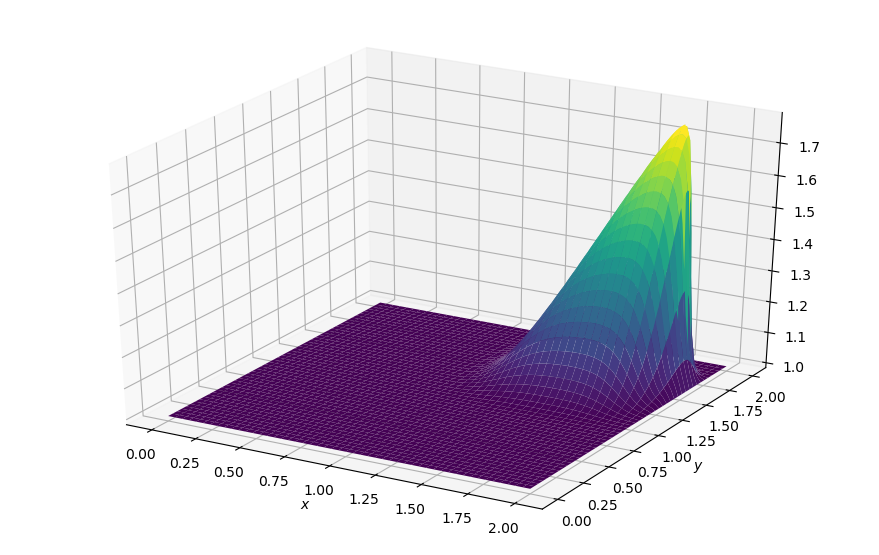

In [14]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

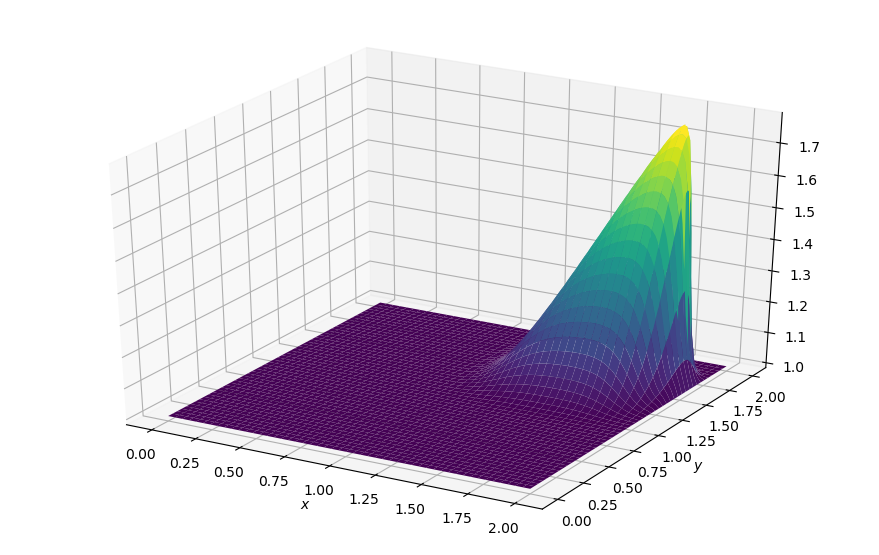

In [15]:

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, v, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');